# Componentes de series de tiempo

In [1]:
# Paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Cargar datos

In [113]:
# importar datos
link = "https://raw.githubusercontent.com/AlvaroM31/Forecasting_aplicado_python/refs/heads/main/Introducci%C3%B3n_T%C3%A9cnico/data.csv"
data = pd.read_csv(link)
# pd.read_csv(link, index_col=0, parse_dates=True) # Forma simple de cargar los datos y evitarse la siguiente linea de codigo
#----------------------------------------------------------------------------------------
# Pero prefiero convertir en indice la columna fecha
data.set_index('Unnamed: 0',inplace=True)
data.head()#.info #type(data)

ventas
Unnamed: 0            
2024-01-01  457.450712
2024-01-02  446.426035
2024-01-03  456.715328
2024-01-04  468.345448
2024-01-05  440.487699

El indice actualmente se carg√≥ como un string, lo cual no deber√≠a suceder y es inconveniente futuramente para los modelos de forecasting, ya que la columna indice debe de ser de tipo fecha.
- Es por ello que se recomienda hacer esta conversi√≥n al inicio, *(al momento de cargar la data)*, en el tercer campo --> pd.read_csv(link, index_col=0, parse_dates=True).
- parse_dates significa --> analizar y convertir en fechas.
- index_col=0 significa, ‚Äúla primera columna‚Äù, de la data se convertira en indice.

In [3]:
# type(data.index[0])
data['Unnamed: 0'] = pd.to_datetime(data.index)
data.set_index('Unnamed: 0', inplace=True)
# type(data.index[0])
data.index.name = None # Eliminar el nombre de la columna

In [4]:
data.head()

ventas
2024-01-01  457.450712
2024-01-02  446.426035
2024-01-03  456.715328
2024-01-04  468.345448
2024-01-05  440.487699

## An√°lisis Exploratorio

In [5]:
data.describe()

ventas
count  137.000000
mean   446.573949
std     72.415699
min    341.634336
25%    389.861260
50%    428.048735
75%    492.981193
max    621.484310

<Axes: >

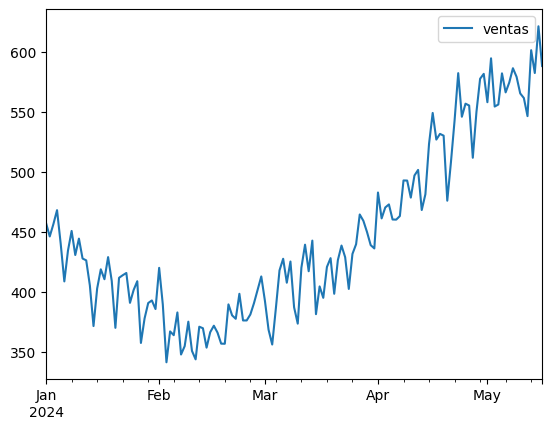

In [6]:
data.plot()

<Axes: >

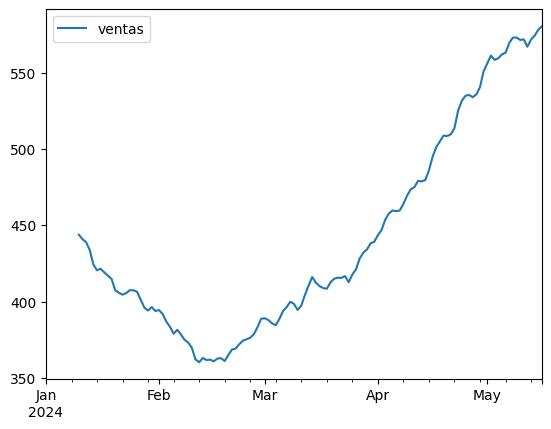

In [7]:
data.rolling(10).mean().plot() # rolling significa ventana m√≥vil

## An√°lisis de tendecia

### üîπ **Promedio m√≥vil (rolling mean)**

Es un m√©todo que suaviza una serie de tiempo calculando el **promedio de los √∫ltimos *n* valores**. Se usa para reducir el "ruido" y resaltar la tendencia general.

üìå *Ejemplo:* Si usamos una ventana de 10 d√≠as, cada punto es el promedio de esos 10 d√≠as anteriores.
- rolling significa ventana m√≥vil

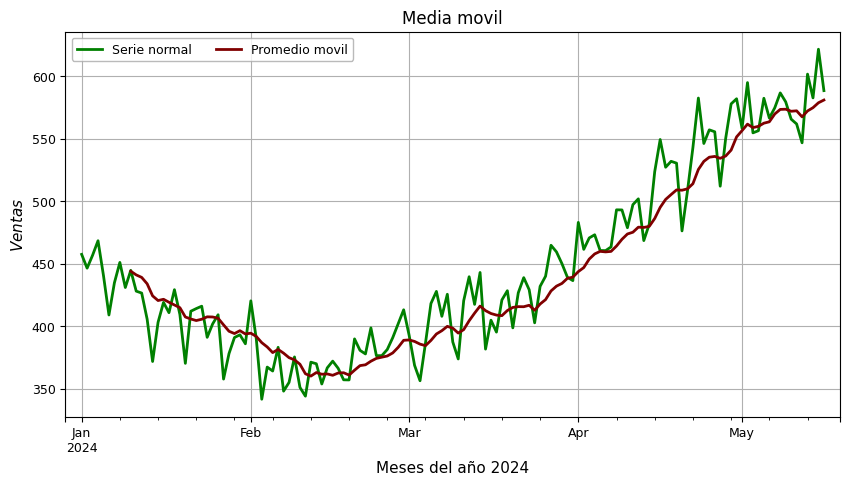

In [8]:
data.ventas.plot(figsize=(10,5), label = 'Serie normal',color = '#008000',lw = 2) # Puedo hacer lo mismo tambien plt.plot
data.ventas.rolling(10).mean().plot(label = 'Promedio movil',color='#800000', lw=2) # Cuando escribo ventas en rolling se pone en la misma grafica
plt.legend(fontsize=9,ncol= 2, edgecolor='#A9A9A9')
plt.tick_params(axis='both', labelsize=9)
plt.title('Media movil', fontsize=12)
plt.xlabel('Meses del a√±o 2024', fontsize=11)
plt.ylabel('$Ventas$', fontsize=11)
plt.xlim(19720,19862) # Rango donde se ubicaran los meses (los meses se miden en numeros sistematicamente)
plt.grid(True)
plt.show()

### üîπ **Promedio m√≥vil exponencial (EWMA)**

Similar al promedio m√≥vil, pero da **m√°s peso a los datos recientes**, lo que lo hace m√°s sensible a cambios. Es ideal para detectar giros r√°pidos en la tendencia.

üìå *Ejemplo:* Con `span=4`, los valores m√°s nuevos tienen m√°s influencia que los antiguos.
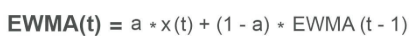

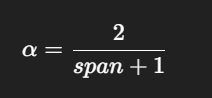

- mientras de tenga un span menor se recolecta menor informaci√≥n de tiempos muy pasados, y mas de tiempo recientes *(periodo anterior)*

In [9]:
data.ventas.ewm(span=5).mean().head()

2024-01-01    457.450712
2024-01-02    450.835906
2024-01-03    453.620896
2024-01-04    459.737248
2024-01-05    452.347611
Name: ventas, dtype: float64

Graficandon los distintos tipos de media m√≥vil exponencial

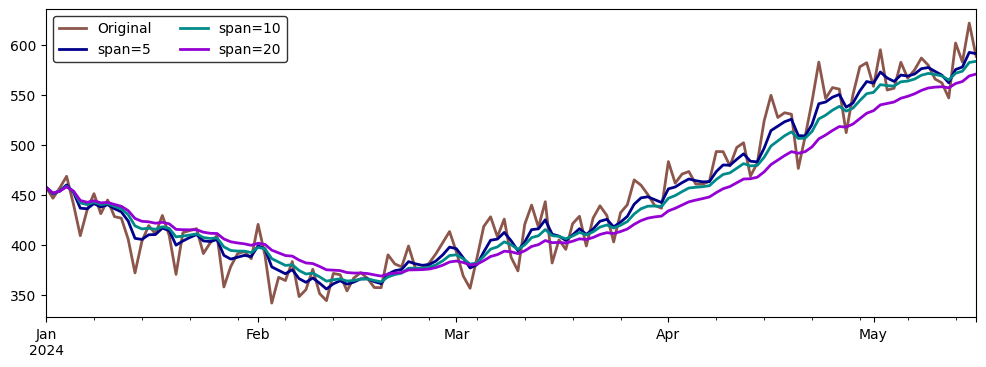

In [10]:
data.ventas.plot(figsize=(12,4), color='#8c564b', lw=2, label = 'Original')
data.ventas.ewm(span=5).mean().plot(color='#00008B',lw=2, label = 'span=5')
data.ventas.ewm(span=10).mean().plot(color='#008B8B',lw=2, label = 'span=10')
data.ventas.ewm(span=20).mean().plot(color='#9400D3',lw=2, label = 'span=20')

plt.legend(loc='upper left', ncol=2,edgecolor='#000000')
plt.savefig('EWMA.png',dpi=300,bbox_inches='tight') #Con esto descargo en 1 imagen
# bordes (bounding box) de la imagen se ajusten autom√°ticamente al contenido de la figura, eliminando los espacios en blanco innecesarios alrededor.

plt.show()

### üîπ **Tendencia LOESS (o LOWESS)**

Es un **suavizado local** que ajusta peque√±os modelos de regresi√≥n a partes de los datos. A diferencia de los promedios, **no asume forma lineal** y se adapta mejor a cambios no lineales.

üìå *Ventaja:* Captura bien curvas suaves o cambios graduales sin necesidad de un modelo global.

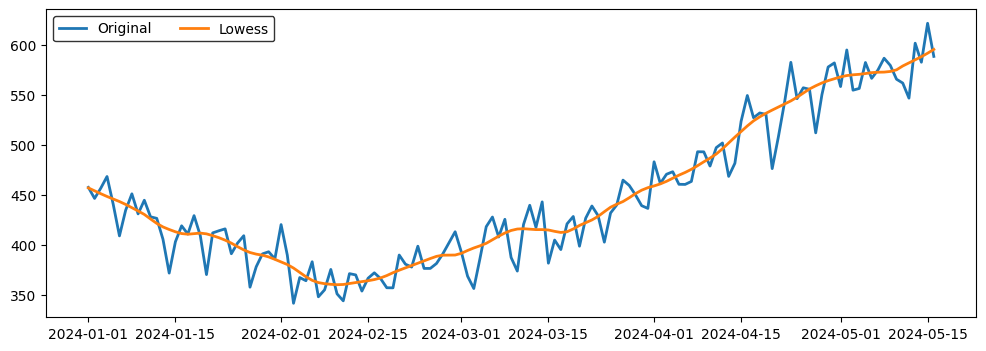

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess
#su desventaja es que es demasiado sensible
#Es bueno cuando una serie tiene varias etapas
loess = lowess(data['ventas'], np.arange(len(data)), frac=0.1)# np.arange genera de 0,1, n-1
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(data.index, data['ventas'], label='Original', lw=2)
plt.plot(data.index, loess[:,1], label = 'Lowess',lw=2) # loess[,1] suaviza la serie, la vuelve decimal
plt.legend(loc='upper left', ncol=2, edgecolor='#000000')
plt.show()

loess[:,1]
- Es como si escogiera la segunda columna solamente, porqe loess genera 2 columnas: indice y serie suavizada.
- Si fuera solamente loess[:,0] se escogeria el indice

## An√°lisis de estacionalidad

### D√≠as de la semana

In [13]:
data.index # Aseg√∫rate de tener el √≠ndice como datetime (Por eso es importante el parse_date)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
               '2024-05-15', '2024-05-16'],
              dtype='datetime64[ns]', length=137, freq=None)

In [16]:
data.index.isocalendar().head()

year  week  day
2024-01-01  2024     1    1
2024-01-02  2024     1    2
2024-01-03  2024     1    3
2024-01-04  2024     1    4
2024-01-05  2024     1    5

####Creaci√≥n de columnas semanas y d√≠as

In [17]:
data['Semana'] = data.index.isocalendar().week
data['D√≠a_semana'] = data.index.day_name() # Puedes usar day si prefieres un n√∫mero

In [20]:
data.head()

ventas  Semana D√≠a_semana
2024-01-01  457.450712       1     Monday
2024-01-02  446.426035       1    Tuesday
2024-01-03  456.715328       1  Wednesday
2024-01-04  468.345448       1   Thursday
2024-01-05  440.487699       1     Friday

In [27]:
data.head()

ventas  Semana D√≠a_semana
2024-01-01  457.450712       1     Monday
2024-01-02  446.426035       1    Tuesday
2024-01-03  456.715328       1  Wednesday
2024-01-04  468.345448       1   Thursday
2024-01-05  440.487699       1     Friday

Ordenar los nombres desde lunes a domingo

In [24]:
dias = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

Transformar de ingles a espa√±ol

In [32]:
data.pivot_table(index='Semana', columns='D√≠a_semana', values='ventas')[dias]

D√≠a_semana      Monday     Tuesday   Wednesday    Thursday      Friday  \
Semana                                                                   
1           457.450712  446.426035  456.715328  468.345448  440.487699   
2           451.011521  430.957884  444.638401  428.048735  426.514054   
3           403.126233  419.065687  410.807533  429.213710  409.379639   
4           414.113355  416.012923  391.128777  401.834259  409.163839   
5           390.990420  393.124594  385.974401  420.284173  389.797542   
6           364.187345  383.132954  348.104948  355.077209  375.452919   
7           371.265276  369.983445  353.822170  366.702337  372.090418   
8           357.054398  389.861260  380.723766  377.846170  398.675144   
9           381.411737  390.861814  401.968951  413.133177  392.812386   
10          386.556901  418.187887  427.843600  407.919848  425.552993   
11          420.420934  439.570548  417.462609  442.969655  381.703823   
12          421.014890  428.376412  398.686466  426.704922  438.856689   
13          431.872596  439.973644  464.731032  459.431267  450.053597   
14          483.029675  461.469204  470.585068  473.118378  460.547276   
15          493.076702  492.981193  478.769439  497.190320  501.859282   
16          523.560763  549.292789  527.118667  531.863256  530.383311   
17          542.903453  582.448632  546.114586  557.023210  555.479323   
18          577.778995  581.865479  558.241541  594.806621  554.619293   
19          566.436073  574.682005  586.553594  579.389042  565.563578   
20          601.574475  582.561578  621.484310  588.368848         NaN   

D√≠a_semana    Saturday      Sunday  
Semana                              
1           408.987946  434.688192  
2           405.629434  371.800796  
3           370.315444  411.984732  
4           357.735096  378.135470  
5           341.634336  367.338174  
6           351.076999  344.070524  
7           366.356833  357.154274  
8           376.464993  376.469202  
9           368.715115  356.404975  
10          387.424540  373.823204  
11          404.828538  395.305706  
12          429.168411  402.725947  
13          439.199011  436.456163  
14          460.441804  463.415829  
15          468.465841  481.580714  
16          476.218432  508.102292  
17          511.969829  550.142342  
18          556.332268  582.268599  
19          561.734327  546.653680  
20                 NaN         NaN

In [33]:
# creando la primera tabla
tabla1 = data.pivot_table(index='Semana', columns='D√≠a_semana', values='ventas')[dias]

Cambiando la tabla 1 sus columnas(dias de la semana) de ingles a espa√±ol

In [44]:
diccionario = {
    'Monday':'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miercoles',
    'Thursday' : 'Jueves',
    'Friday':'Viernes',
    'Saturday':'Sabado',
    'Sunday': 'Domingo'
}

In [46]:
# Lista en espa√±ol
espa√±ol = ['Lunes', 'Martes', 'Miercoles','Jueves', 'Viernes', 'Sabado', 'Domingo']

In [45]:
tabla1.rename(columns=diccionario, inplace=True)

####Graficar cada d√≠a en subplots

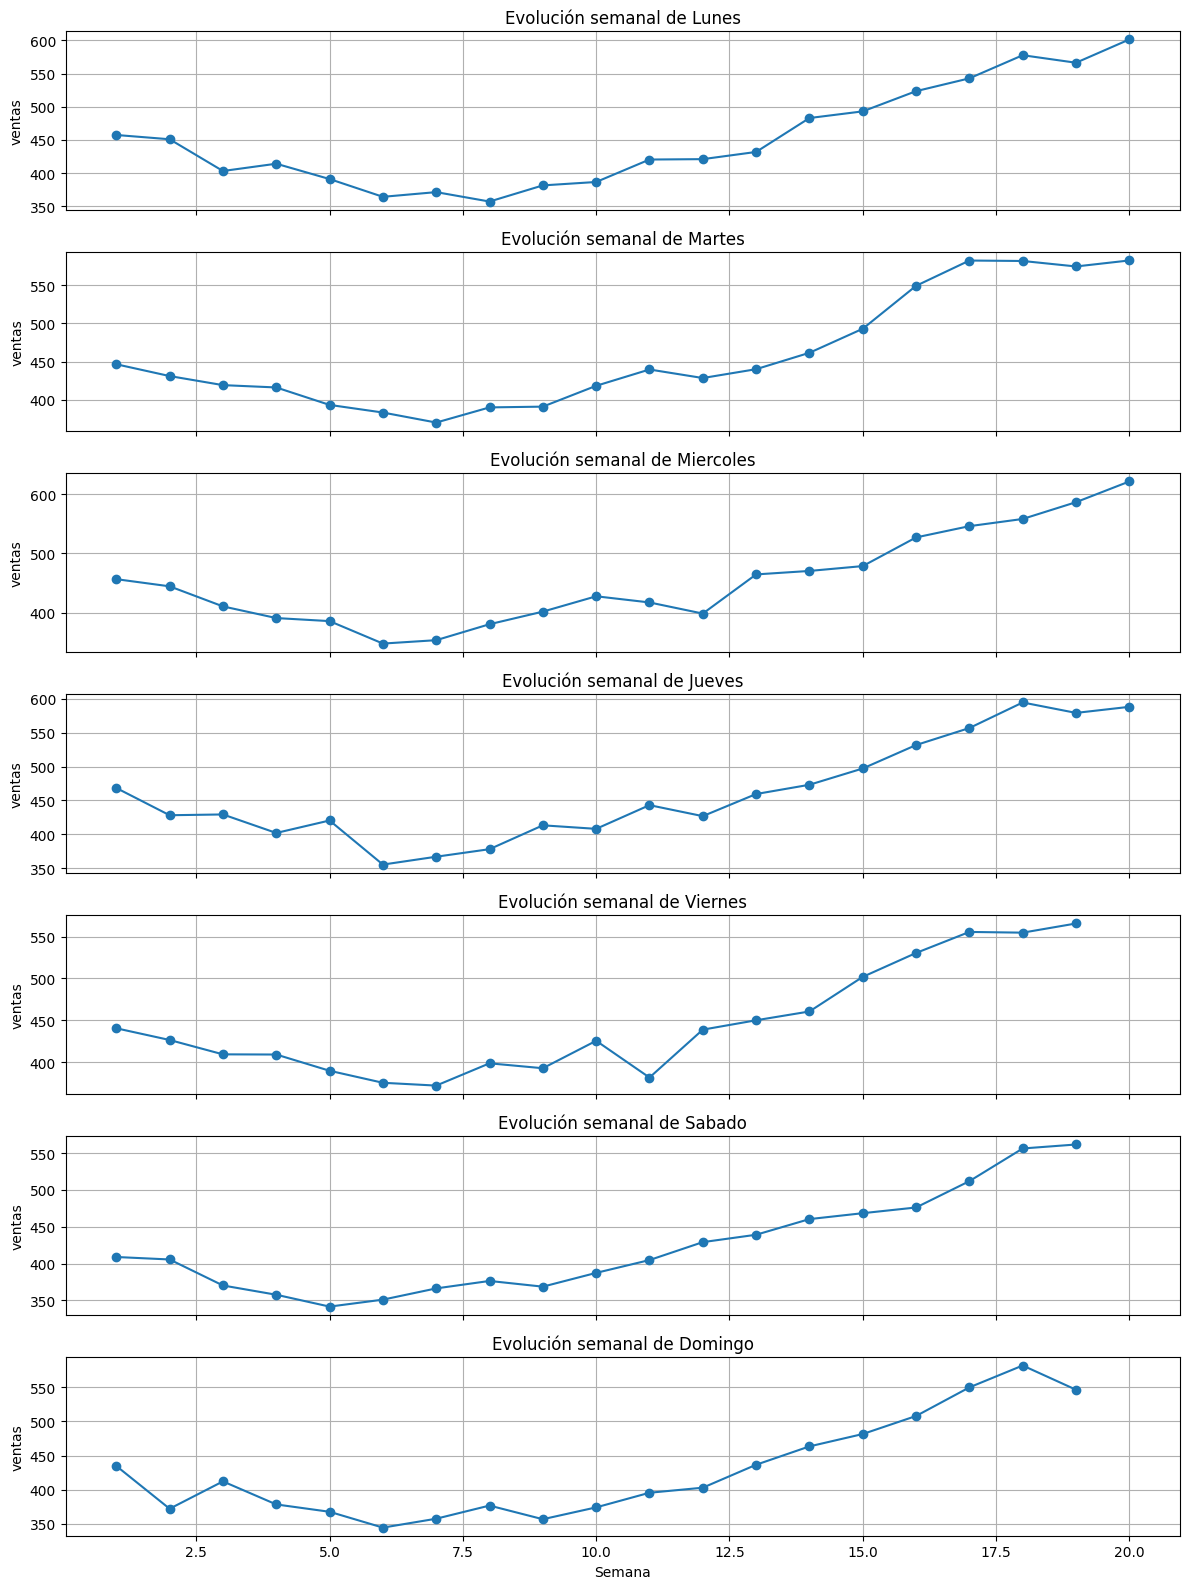

In [54]:
fig, axes = plt.subplots(7,1,figsize=(12,16),sharex=True)
#sharex sirve para compartir el mismo eje x en todos y solos se muestre al final
for i, dia in enumerate(espa√±ol):
  axes[i].plot(tabla1.index,tabla1[dia], marker='o')
  axes[i].set_title(f'Evoluci√≥n semanal de {dia}')
  axes[i].set_ylabel('ventas')
  axes[i].grid(True)
plt.xlabel('Semana')
plt.tight_layout()
'''ajustar autom√°ticamente los espacios entre subgr√°ficos y los m√°rgenes de la figura, evitando que
los elementos (t√≠tulos, etiquetas de ejes, leyendas) se mezclen o se corten'''
plt.show()

### Boxplot por dia de la semana

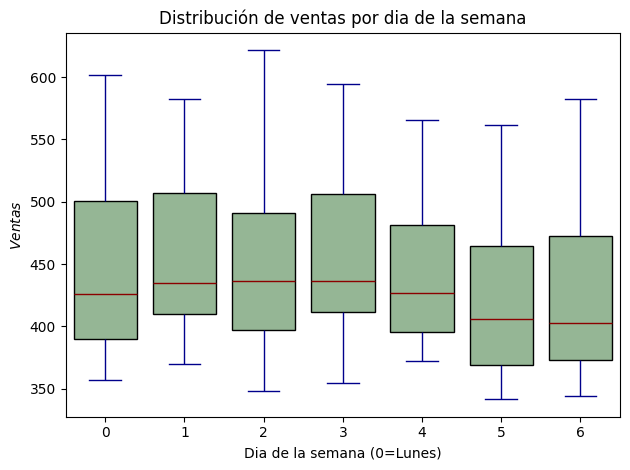

In [75]:
sns.boxplot(x=data.index.dayofweek,y=data['ventas'],color='#8FBC8F',
            boxprops=dict(edgecolor="#000000"),  # borde de la caja
            whiskerprops=dict(color="#00008B"),     # l√≠neas de los bigotes
            capprops=dict(color="#00008B"),         # terminales de los bigotes
            medianprops=dict(color="#8B0000"))     # l√≠nea de la mediana)
plt.title('Distribuci√≥n de ventas por dia de la semana', fontsize=12)
plt.xlabel('Dia de la semana (0=Lunes)', fontsize=10)
plt.ylabel('$Ventas$',fontsize=10)
plt.tight_layout()
plt.show()

###Comparaci√≥n de densidad para diferencias de 5 a 9

- data['ventas'] - data['ventas'].shift(lag) es igual que data.ventas.diff(lag)

In [82]:
#data.ventas.diff(7)
(data['ventas']-data['ventas'].shift(7)).dropna().head()

2024-01-08    -6.439191
2024-01-09   -15.468151
2024-01-10   -12.076927
2024-01-11   -40.296713
2024-01-12   -13.973646
Name: ventas, dtype: float64

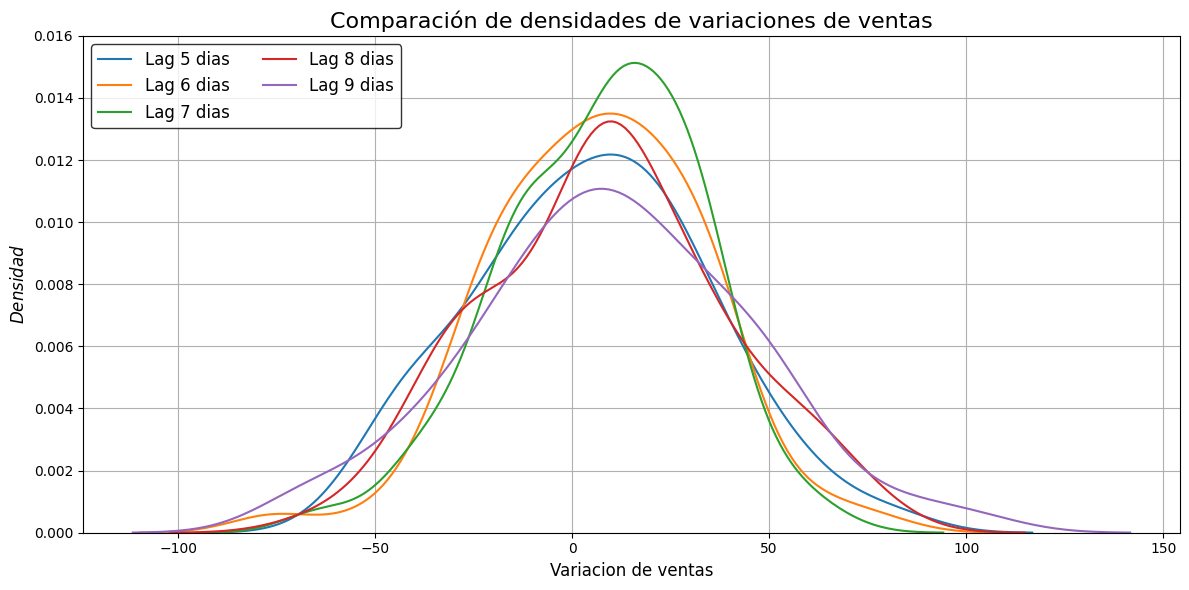

In [103]:
# Crear las diferencias con lags de 5 a 9 d√≠as
for lag in range(5,10):
  data[f'diff_{lag}'] = data.ventas.diff(lag)
# Graficar las densidades (KDE) de cada diferencia
# la densidad nos dice la concentracion mas alta de datos
plt.figure(figsize=(12,6))

for lag in range(5,10):
  sns.kdeplot(data[f'diff_{lag}'].dropna(), label=f'Lag {lag} dias')
# kdeplot = densidad kernel (Kernel Density Estimation - KDE), lo estima de forma gaussiana/normal
plt.title('Comparaci√≥n de densidades de variaciones de ventas',fontsize=16)
plt.xlabel('Variacion de ventas',fontsize=12)
plt.ylabel('$Densidad$',fontsize=12)
plt.legend(loc='upper left',fontsize=12,ncol=2,edgecolor='#000000')
plt.ylim(0,0.016)
plt.grid(True)
plt.tight_layout()
plt.show()

## Descomposici√≥n Final
- Ahora que hemos comprobado que la tendencia es lineal y que existe una estacionalidad aditiva con un patr√≥n semanal (7 periodos), procedemos a realizar la descomposici√≥n de la serie temporal. Esto nos permitir√° separar y analizar de forma individual los componentes de tendencia, estacionalidad y residuo, facilitando una mejor comprensi√≥n del comportamiento subyacente de los datos.

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Aplicar descomposici√≥n aditiva
descomposici√≥n = seasonal_decompose(data['ventas'],model='additive', period=7)

In [107]:
#seasonal, tren,otros.
descomposici√≥n.observed.head()

2024-01-01    457.450712
2024-01-02    446.426035
2024-01-03    456.715328
2024-01-04    468.345448
2024-01-05    440.487699
Name: ventas, dtype: float64

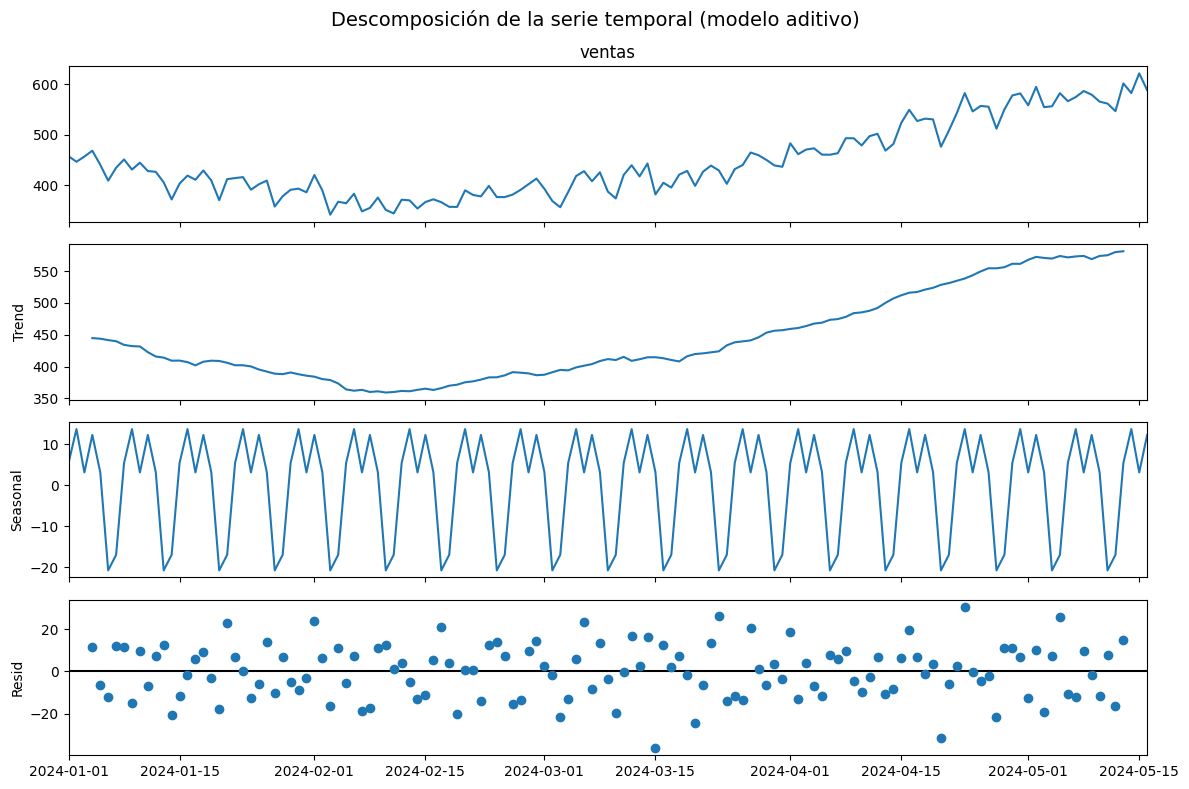

In [111]:
# Graficar los componentes
fig=descomposici√≥n.plot()
fig.set_size_inches(12,8) #ajustar el tama√±o despues de crear la figura
plt.suptitle('Descomposici√≥n de la serie temporal (modelo aditivo)', fontsize=14)
plt.tight_layout()
plt.savefig('descomposicion.png',dpi=400,bbox_inches='tight')
plt.show()